In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')

df = sns.load_dataset('titanic')  


df = df.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [59]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [60]:
# Age: numeric -> impute with median
df['age']=df['age'].fillna(df['age'].median())

In [61]:
# Embarked & Embark_town: categorical -> impute with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [62]:
# Deck: many missing -> fill with 'Unknown'
df['deck'] = df['deck'].cat.add_categories('Unknown').fillna('Unknown')


In [63]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [64]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    df.drop_duplicates(inplace=True)

Number of duplicate rows: 110


In [65]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"Number of outliers in 'fare': {len(outliers)}")


df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

Number of outliers in 'fare': 102


In [66]:
df['sex'].str.lower()
df['sex'].value_counts()

sex
male      448
female    231
Name: count, dtype: int64

In [67]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,0.366716,2.419735,29.003682,0.505155,0.393225,19.484855
std,0.482263,0.767496,13.606786,1.018800,0.834373,14.789563
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,6.000000,71.283300


In [68]:
categorical_cols = ['sex', 'class', 'embarked', 'deck', 'who', 'adult_male', 'embark_town']
for col in categorical_cols:
    print(f"\nFrequency of {col}:")
    print(df[col].value_counts())


Frequency of sex:
sex
male      448
female    231
Name: count, dtype: int64

Frequency of class:
class
Third     402
Second    160
First     117
Name: count, dtype: int64

Frequency of embarked:
embarked
S    516
C    106
Q     57
Name: count, dtype: int64

Frequency of deck:
deck
Unknown    560
E           26
C           25
B           19
D           18
A           14
F           13
G            4
Name: count, dtype: int64

Frequency of who:
who
man      411
woman    192
child     76
Name: count, dtype: int64

Frequency of adult_male:
adult_male
True     411
False    268
Name: count, dtype: int64

Frequency of embark_town:
embark_town
Southampton    516
Cherbourg      106
Queenstown      57
Name: count, dtype: int64


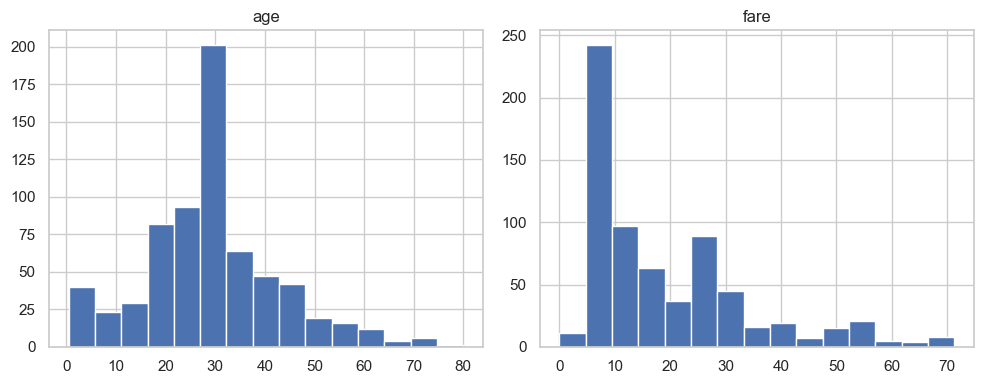

In [69]:
numeric_cols = ['age', 'fare']
df[numeric_cols].hist(bins=15, figsize=(10, 4))
plt.tight_layout()
plt.show()

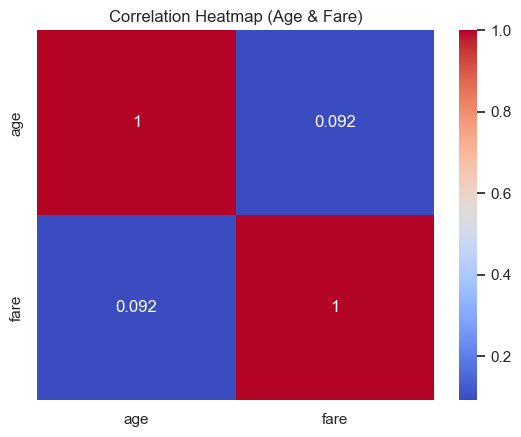

In [70]:
# Compute correlation among numeric features
corr_matrix = df[['age', 'fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Age & Fare)')
plt.show()


In [71]:
pd.crosstab(df['class'], df['survived'])


survived,0,1
class,,
First,56,61
Second,76,84
Third,298,104


In [72]:
pd.crosstab(df['sex'], df['survived'])


survived,0,1
sex,,
female,74,157
male,356,92


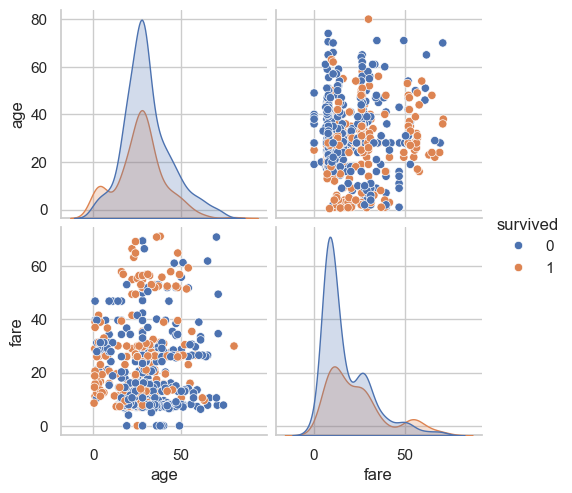

In [73]:
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()


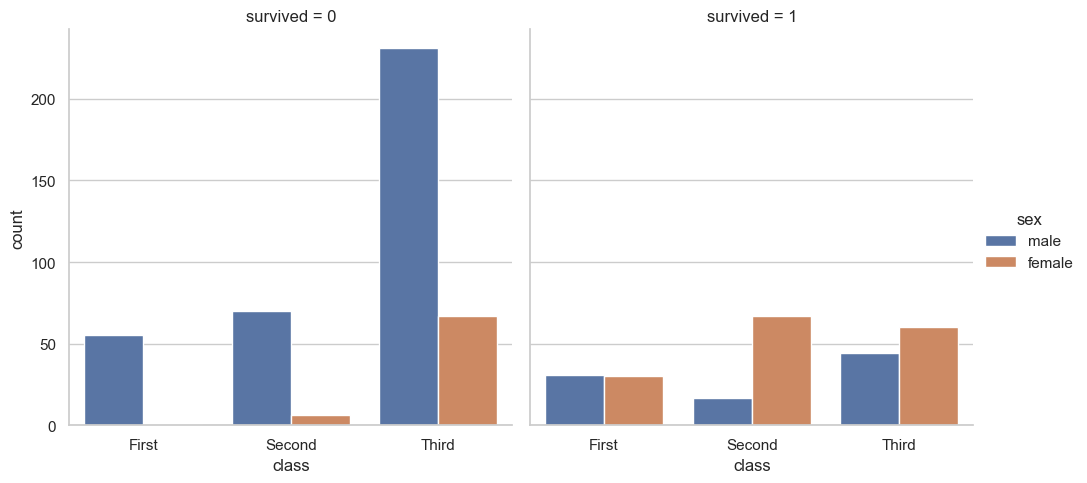

In [74]:
sns.catplot(data=df, x='class', hue='sex', col='survived', kind='count')
plt.show()


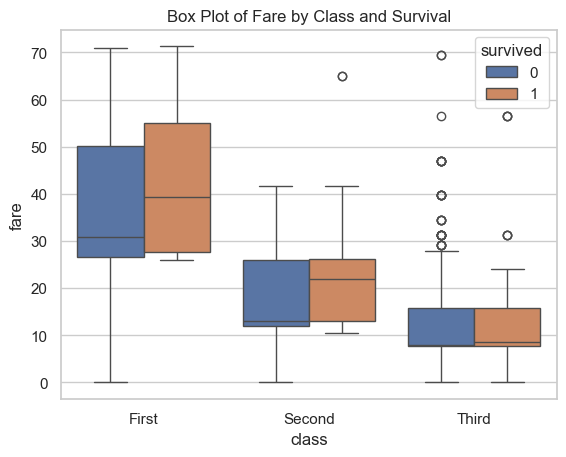

In [75]:
sns.boxplot(data=df, x='class', y='fare', hue='survived')
plt.title('Box Plot of Fare by Class and Survival')
plt.show()
